In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score
)

In [2]:

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]
df = pd.read_csv(url, header=None, names=columns)

# Drop rows with missing values
df = df[df['stalk-root'] != '?']

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split features and target
X = df.drop('class', axis=1)
y = df['class']


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

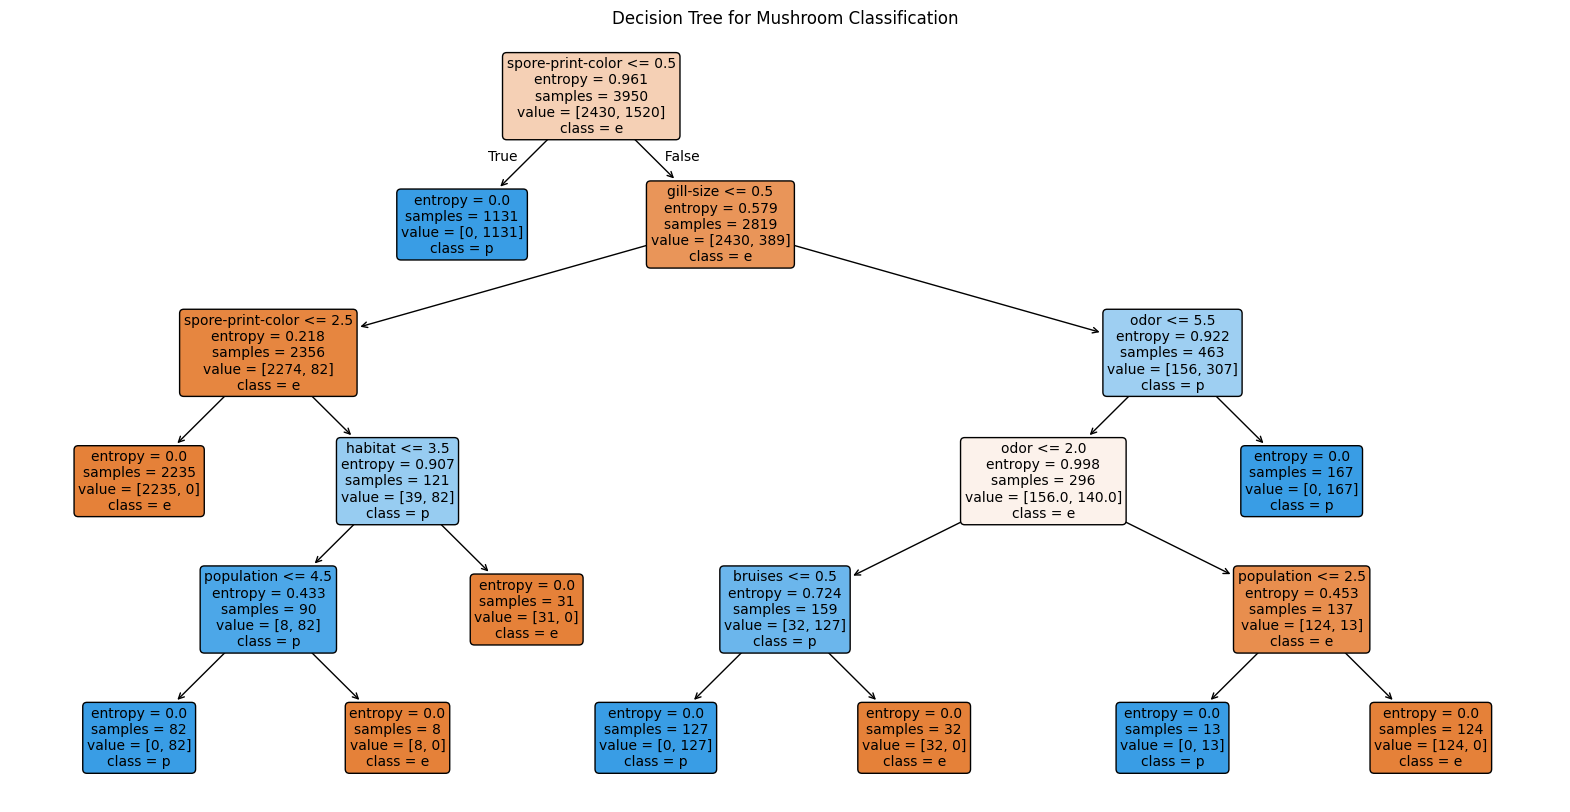

In [4]:
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=label_encoders['class'].classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Mushroom Classification")
plt.show()


In [5]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Compute the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)  # Also known as recall
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)
youden_j = sensitivity + specificity - 1  # Youden's J-index (SPB)

# Display the results
print(f"Confusion Matrix:\nTP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Youden's J-index (SPB): {youden_j:.4f}")


Confusion Matrix:
TP: 636, FP: 0, FN: 0, TN: 1058
Accuracy: 1.0000
Precision: 1.0000
Sensitivity (Recall): 1.0000
Specificity: 1.0000
F1 Score: 1.0000
Youden's J-index (SPB): 1.0000
